In [31]:
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
import warnings 
warnings.filterwarnings("ignore")

In [32]:
# creating dataset
np.random.seed(42)
def PointsInCircum(r,n=100):
    return [(math.cos(2*math.pi/n*x)*r+np.random.normal(-30,30),math.sin(2*math.pi/n*x)*r+np.random.normal(-30,30)) for x in range(1,n+1)]

In [33]:
# Creating data points in the form of a circle
df=pd.DataFrame(PointsInCircum(500,1000))
df=df.append(PointsInCircum(300,700))
df=df.append(PointsInCircum(100,300))

In [34]:
# adding noise to dataset
df=df.append([(np.random.randint(-600,600),np.random.randint(-600,600)) for i in range(300)])
df

,0,1
0,484.891555,-31.006357
1,489.391178,21.973916
2,462.886575,-27.599889
3,517.218479,5.588090
4,455.669049,1.982181
...,...,...
295,-229.000000,-504.000000
296,392.000000,-580.000000
297,134.000000,525.000000
298,469.000000,-535.000000


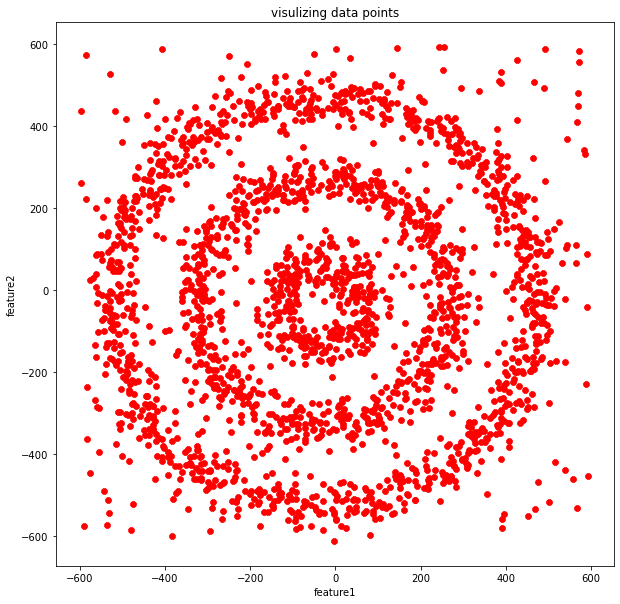

In [35]:
# ploting above data using plt
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],marker='8',color='red')
plt.title("visulizing data points")
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.show()

# Kmeans vs DBSCAN

In [36]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=4,random_state=42)
km.fit(df[[0,1]])

KMeans(n_clusters=4, random_state=42)

In [37]:
df['labels_kmeans']=km.labels_

In [38]:
df

,0,1,labels_kmeans
0,484.891555,-31.006357,3
1,489.391178,21.973916,3
2,462.886575,-27.599889,3
3,517.218479,5.588090,3
4,455.669049,1.982181,3
...,...,...,...
295,-229.000000,-504.000000,2
296,392.000000,-580.000000,0
297,134.000000,525.000000,3
298,469.000000,-535.000000,0


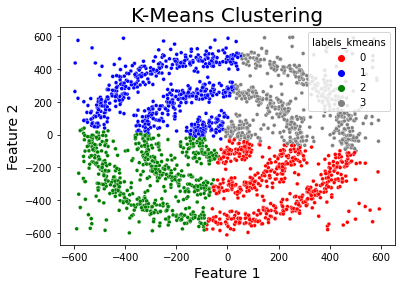

In [43]:
colors = ['red','blue','green','grey']
sns.scatterplot(df[0],df[1],hue=df['labels_kmeans'],palette=colors,s=15)
plt.title('K-Means Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

# DBSCAN Clustering

In [44]:
from sklearn.cluster import DBSCAN
db = DBSCAN()
db.fit(df[[0,1]])

DBSCAN()

In [45]:
df['dbscan_lables'] = db.labels_

In [46]:
df

,0,1,labels_kmeans,dbscan_lables
0,484.891555,-31.006357,3,-1
1,489.391178,21.973916,3,-1
2,462.886575,-27.599889,3,-1
3,517.218479,5.588090,3,-1
4,455.669049,1.982181,3,-1
...,...,...,...,...
295,-229.000000,-504.000000,2,-1
296,392.000000,-580.000000,0,-1
297,134.000000,525.000000,3,-1
298,469.000000,-535.000000,0,-1


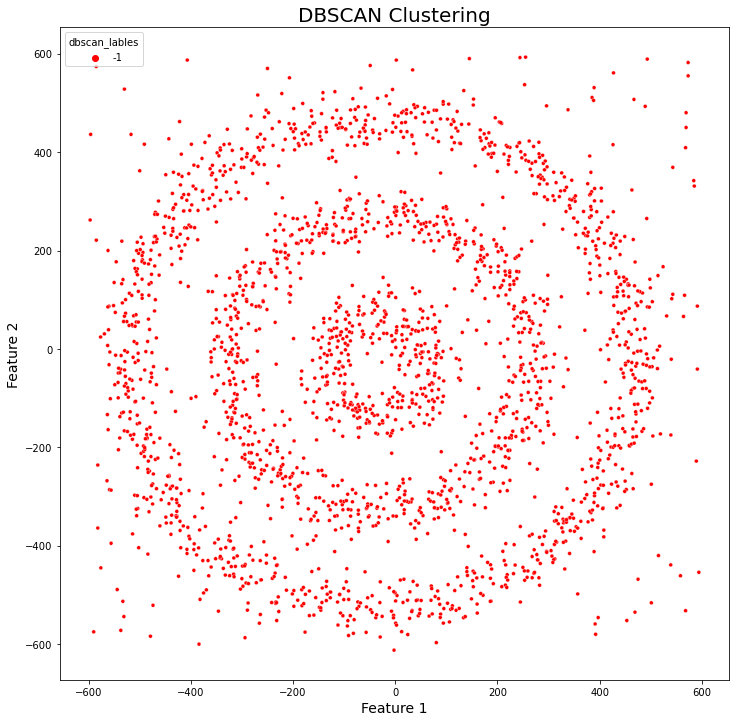

In [52]:
plt.figure(figsize=(12,12))
sns.scatterplot(df[0],df[1],hue=df['dbscan_lables'],palette=['red'],s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [53]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df[[0,1]])
distances, indices = nbrs.kneighbors(df[[0,1]])

Text(0, 0.5, 'eplsilon')

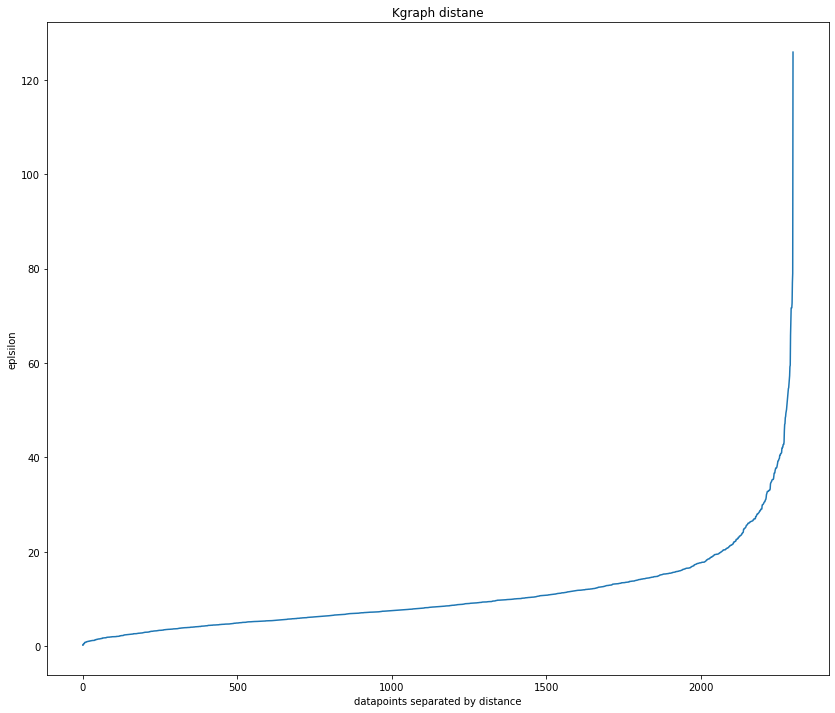

In [57]:
dis = np.sort(distances,axis=0)
dis = dis[:,1]
plt.figure(figsize=(14,12))
plt.plot(dis)
plt.title("Kgraph distane")
plt.xlabel('datapoints separated by distance')
plt.ylabel('eplsilon')

In [59]:
db2=DBSCAN(eps=30,min_samples=3)
db2.fit(df[[0,1]])

DBSCAN(eps=30, min_samples=3)

In [61]:
df["db2_labels"] = db2.labels_
df['db2_labels'].value_counts()

 0     1060
 5      747
 8      319
-1      130
 7        5
 2        4
 3        4
 4        4
 10       3
 13       3
 12       3
 11       3
 6        3
 9        3
 15       3
 1        3
 14       3
Name: db2_labels, dtype: int64

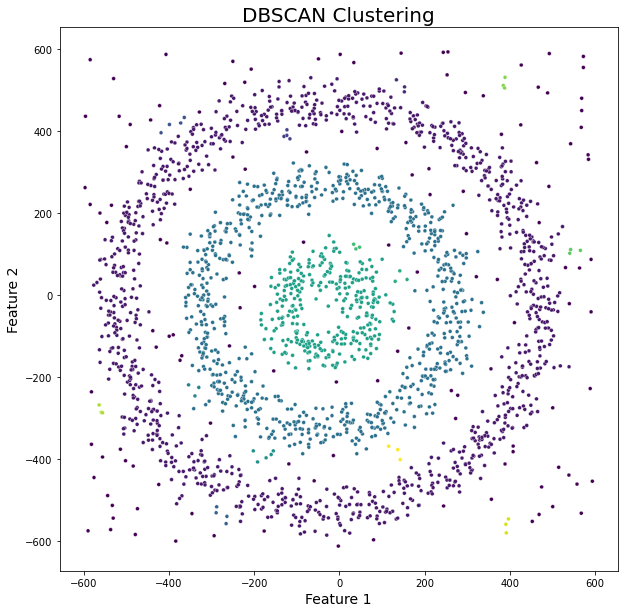

In [66]:
# Plotting the resulting clusters
plt.figure(figsize=(10,10))
sns.scatterplot(df[0],df[1],c=df['db2_labels'],palette=colors,s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()